In [74]:
import numpy as np
import pandas as pd
from densratio import densratio
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
def entropy(data, window_s):
  
  def calc(info):
    info = info.value_counts()
    num = []
    for i in info:
      num.append(i/window_s * np.log2(i/window_s))
    sum_entro = sum(num) * -1
    return sum_entro

  entro = []
  for x in range(0, len(data), window_s):
    window = data.iloc[x:x+window_s, :]
    hensu = np.array(window.apply(lambda y: calc(y)))
    entro.append(hensu)
  
  return np.array(entro)

In [78]:
train_data = pd.read_csv("./pcap_data/outside/week1_fri.csv")
test_data = pd.read_csv("./pcap_data/outside/week2_wed.csv")
#train_data = pd.read_csv("./mawilab/train.csv")
#test_data = pd.read_csv("./mawilab/mawilab_anom2.csv")
#train_data

In [80]:
len(test_data)

888139

In [346]:
entro_train = train_data.iloc[:, 3:]
entro_test = test_data.iloc[:, 3:]
entro_train.head()

,Source,Destination,Src Port,Dest port,Protocol
0,HP_61:aa:c9,HP_61:aa:c9,NaN,NaN,LLC
1,CiscoInc_38:46:32,CiscoInc_38:46:32,NaN,NaN,LOOP
2,HP_61:aa:c9,HP_61:aa:c9,NaN,NaN,LLC
3,HP_61:aa:c9,HP_61:aa:c9,NaN,NaN,LLC
4,HP_61:aa:c9,HP_61:aa:c9,NaN,NaN,LLC


In [347]:
window_size = 200

train_entro = sum(entropy(entro_train, window_size))
test_entro = sum(entropy(entro_test, window_size))

In [348]:
result = densratio(train_entro, test_entro)

################## Start uLSIF ##################
Searching optimal sigma and lambda...
  sigma = 0.001, lambda = 0.001, score = -0.000
  sigma = 0.003, lambda = 0.001, score = -0.000
  sigma = 0.010, lambda = 0.001, score = -0.002
  sigma = 0.032, lambda = 0.001, score = -0.030
  sigma = 0.100, lambda = 0.001, score = -0.333
  sigma = 0.316, lambda = 0.001, score = -0.583
  sigma = 0.316, lambda = 0.003, score = -0.589
  sigma = 1.000, lambda = 0.010, score = -0.593
  sigma = 1.000, lambda = 0.032, score = -0.606
  sigma = 1.000, lambda = 0.100, score = -0.606
Found optimal sigma = 1.000, lambda = 0.100.
Optimizing alpha...
End.
################## Finished uLSIF ###############


In [349]:
w_hat = result.compute_density_ratio(train_entro)

In [350]:
anom_score = -np.log(w_hat)

In [351]:
anom_percentile = 5
thresh = np.percentile(anom_score, 100-anom_percentile)

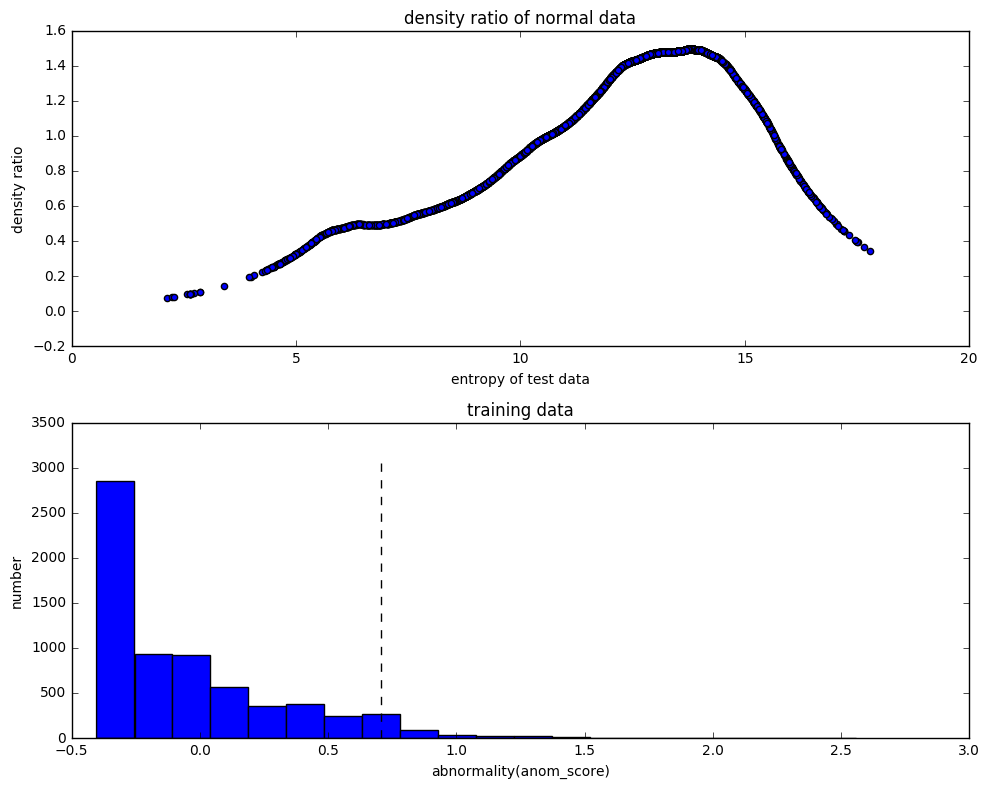

In [352]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.scatter(train_entro, list(w_hat))
plt.title("density ratio of normal data")
plt.xlabel("entropy of test data")
plt.ylabel("density ratio")
plt.subplot(212)
res = plt.hist(anom_score, bins=20)
n_max = np.max(res[0])
plt.plot([thresh, thresh], [0, n_max*1.1], "k--", lw=1)
plt.title("training data")
plt.xlabel("abnormality(anom_score)")
plt.ylabel("number")
plt.tight_layout()
plt.show()
plt.savefig( 'mon_tue2_entropy.png' )

In [353]:
w_hat_test = result.compute_density_ratio(test_entro)

In [354]:
test_anom_score = -np.log(w_hat_test)

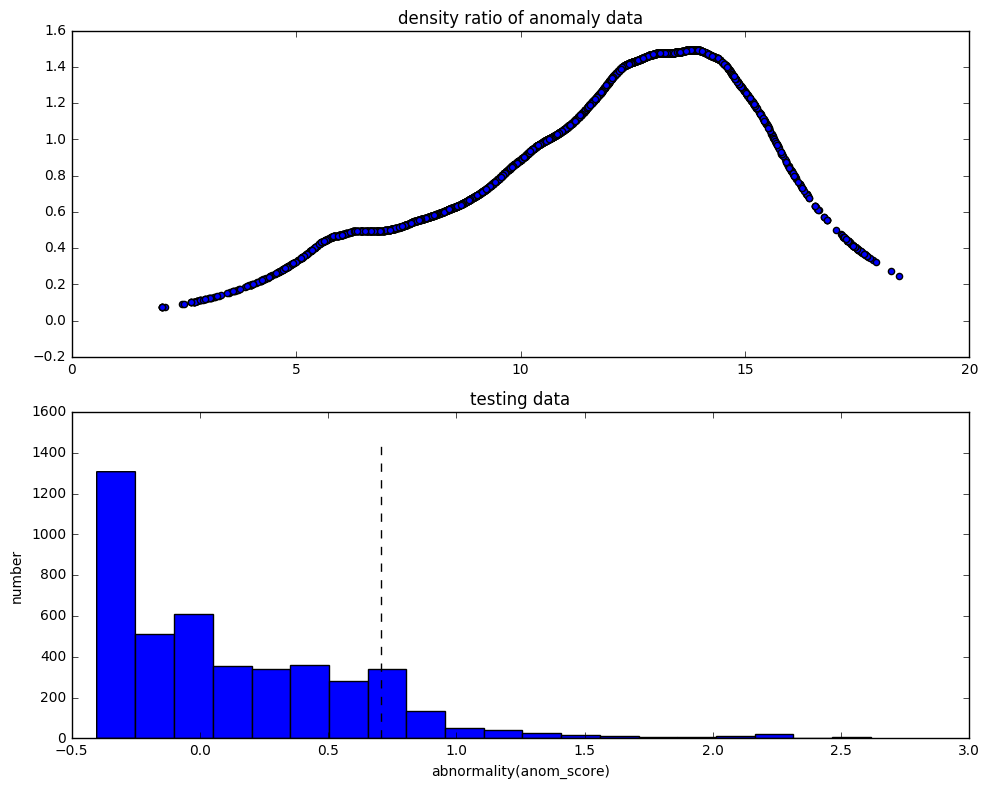

In [357]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.scatter(test_entro, list(w_hat_test))
plt.title("density ratio of anomaly data")
plt.subplot(212)
res = plt.hist(test_anom_score, bins=20)
n_max = np.max(res[0])
plt.plot([thresh, thresh], [0, n_max*1.1], "k--", lw=1)
plt.title("testing data")
plt.xlabel("abnormality(anom_score)")
plt.ylabel("number")
plt.tight_layout()
plt.show()
plt.savefig( 'mon_tue2_entropy.png' )

In [356]:
len(test_anom_score[test_anom_score > thresh])/len(test_anom_score)

0.11528934924566539

In [3]:
col = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',  'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label_type']

In [4]:
train_kdd = pd.read_csv('kddcup.data', names=col)
test_kdd = pd.read_csv("kddcup.testdata", names=col)

In [69]:
train_kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label_type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [37]:
kdd = train_kdd[train_kdd['label_type'].isin(['normal.'])]
test_kdd = test_kdd[test_kdd['label_type'].isin(['normal.'])]
#test_kdd = train_kdd[train_kdd['label_type'].isin(['normal.'])]
#test_kdd = pd.concat([test_kdd, train_kdd.iloc[10000:20000, :]], ignore_index=True)

In [6]:
train_kdd['label_type'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: label_type, dtype: int64

In [26]:
kdd = kdd.iloc[:10000, :]
test_kdd = test_kdd.iloc[:10000, :]

In [54]:
def set_en(df):
  #for i in range(0, len(df.index)):
  #  varcat = str(df.iloc[i, 0]) + str(df.iloc[i, 1]) + str(df.iloc[i, 2]) + str(df.iloc[i, 3]) + str(df.iloc[i, 4])
  #  setarr.append(varcat)
  df5 = df.apply(lambda x: '{}_{}_{}'.format(x[0],x[1],x[2]), axis=1)
  return pd.DataFrame(df5)

In [61]:
#train = np.array(kdd.iloc[:, 4:41]).T
#test = np.array(test_kdd.iloc[:, 4:41]).T
train = entropy(set_en(kdd.iloc[:, 1:4]), 30)
test = entropy(set_en(test_kdd.iloc[:, 1:4]), 30)

In [62]:
kdd_result = densratio(train,test)

################## Start uLSIF ##################
Searching optimal sigma and lambda...
  sigma = 0.001, lambda = 0.001, score = 3.789
  sigma = 0.001, lambda = 0.003, score = -0.031
  sigma = 0.001, lambda = 0.010, score = -0.324
  sigma = 0.001, lambda = 0.032, score = -0.362
  sigma = 0.001, lambda = 0.100, score = -0.394
  sigma = 0.001, lambda = 0.316, score = -0.408
  sigma = 0.003, lambda = 0.316, score = -0.408
  sigma = 0.010, lambda = 0.316, score = -0.408
  sigma = 0.032, lambda = 0.316, score = -0.408
  sigma = 0.100, lambda = 0.316, score = -0.411
  sigma = 0.316, lambda = 0.100, score = -0.431
  sigma = 0.316, lambda = 0.316, score = -0.465
  sigma = 1.000, lambda = 1.000, score = -0.498
  sigma = 3.162, lambda = 0.316, score = -0.500
  sigma = 10.000, lambda = 0.032, score = -0.500
  sigma = 10.000, lambda = 0.100, score = -0.500
Found optimal sigma = 10.000, lambda = 0.100.
Optimizing alpha...
End.
################## Finished uLSIF ###############


In [63]:
kdd_what = kdd_result.compute_density_ratio(train)

In [64]:
kdd_train_anomscore = -np.log(kdd_what)

In [65]:
anom_percentile = 5
thresh = np.percentile(kdd_train_anomscore, 100-anom_percentile)

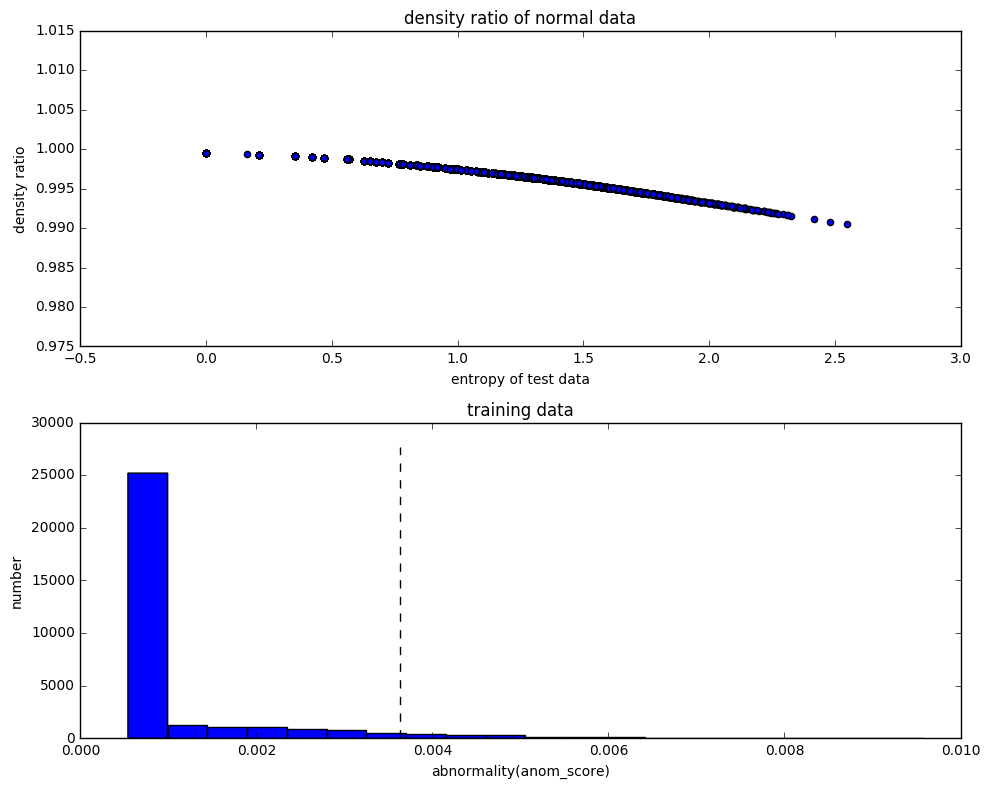

In [66]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.scatter(train, list(kdd_what))
plt.title("density ratio of normal data")
plt.xlabel("entropy of test data")
plt.ylabel("density ratio")
plt.subplot(212)
res = plt.hist(kdd_train_anomscore, bins=20)
n_max = np.max(res[0])
plt.plot([thresh, thresh], [0, n_max*1.1], "k--", lw=1)
plt.title("training data")
plt.xlabel("abnormality(anom_score)")
plt.ylabel("number")
plt.tight_layout()
plt.show()
plt.savefig( 'train_neptune_entropy.png' )

In [67]:
kdd_test_what = kdd_result.compute_density_ratio(test)

In [68]:
kdd_test_anomscore = -np.log(kdd_test_what)

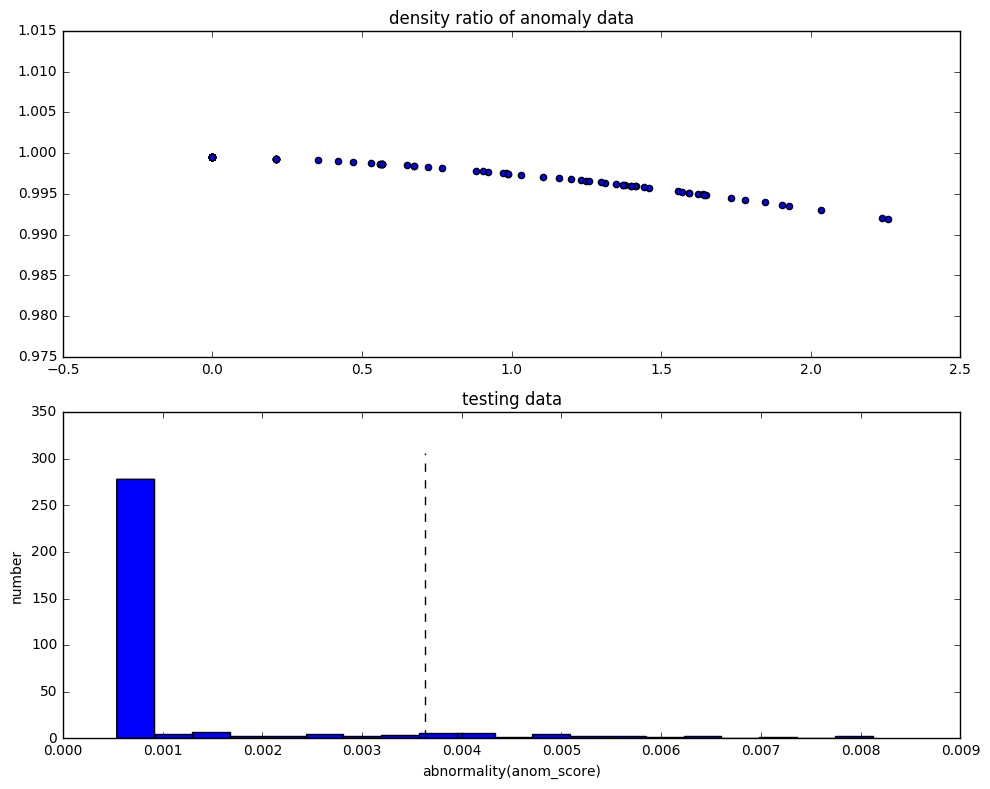

In [69]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.scatter(test, list(kdd_test_what))
plt.title("density ratio of anomaly data")
plt.subplot(212)
res = plt.hist(kdd_test_anomscore, bins=20)
n_max = np.max(res[0])
plt.plot([thresh, thresh], [0, n_max*1.1], "k--", lw=1)
plt.title("testing data")
plt.xlabel("abnormality(anom_score)")
plt.ylabel("number")
plt.tight_layout()
plt.show()
plt.savefig( 'test_neptune_entropy.png' )

In [70]:
len(kdd_test_anomscore[kdd_test_anomscore > thresh])/len(kdd_test_anomscore)

0.08083832335329341

In [71]:
week1 = [6.7, 4.5, 8, 7.48]

In [75]:
week2 = [6.73, 9.29, 6.18, 6.29]

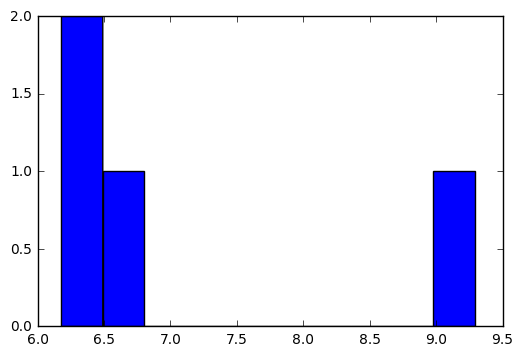

In [76]:
x = np.array([1,2,3,4])